# **Netflix_Recommendation**

**Problem Statement**
In today’s world OTT platform and Streaming Services have taken up a big chunk in the Retail and Entertainment industry. Organizations like Netflix, Amazon etc. analyse User Activity Pattern’s and suggest products that better suit the user needs and choices.

For the purpose of this Project we will be creating one such Recommendation Engine from the ground-up, where every single user, based on there area of interest and ratings, would be recommended a list of movies that are best suited for them

**Dataset Information**

1. ID – Contains the separate keys for customer and movies.

2. Rating – A section contains the user ratings for all the movies.

3. Genre – Highlights the category of the movie.

4. Movie Name – Name of the movie with respect to the movie id.


In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Reading dataset file

Netflix_dataset = pd.read_csv('/content/CapstoneDataSet (1).csv')

In [4]:
Netflix_dataset.head()

,Cust_Id,Rating,Movie_Id,Genre,MovieName
0,1488844,3.0,1.0,Action,Dinosaur Planet
1,822109,5.0,1.0,Action,Dinosaur Planet
2,885013,4.0,1.0,Action,Dinosaur Planet
3,30878,4.0,1.0,Action,Dinosaur Planet
4,823519,3.0,1.0,Action,Dinosaur Planet


In [22]:
Netflix_dataset.shape

(49544, 5)

In [ ]:
Netflix_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693062 entries, 0 to 693061
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Cust_Id    693062 non-null  int64 
 1   Rating     693062 non-null  int64 
 2   Movie_Id   693062 non-null  int64 
 3   Genre      693062 non-null  object
 4   MovieName  693062 non-null  object
dtypes: int64(3), object(2)
memory usage: 26.4+ MB


In [ ]:
Netflix_dataset.describe()

,Cust_Id,Rating,Movie_Id
count,6.930620e+05,693062.00000,693062.000000
mean,1.323862e+06,3.59254,94.868344
std,7.645916e+05,1.08752,59.407203
min,6.000000e+00,1.00000,1.000000
25%,6.617120e+05,3.00000,30.000000
50%,1.320968e+06,4.00000,97.000000
75%,1.986365e+06,4.00000,148.000000
max,2.649429e+06,5.00000,187.000000


# **Exploratory Data Analysis**

**Distribution of Ratings**

<ipython-input-7-3d27da0d4e84>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Rating', data=Netflix_dataset, palette='viridis')


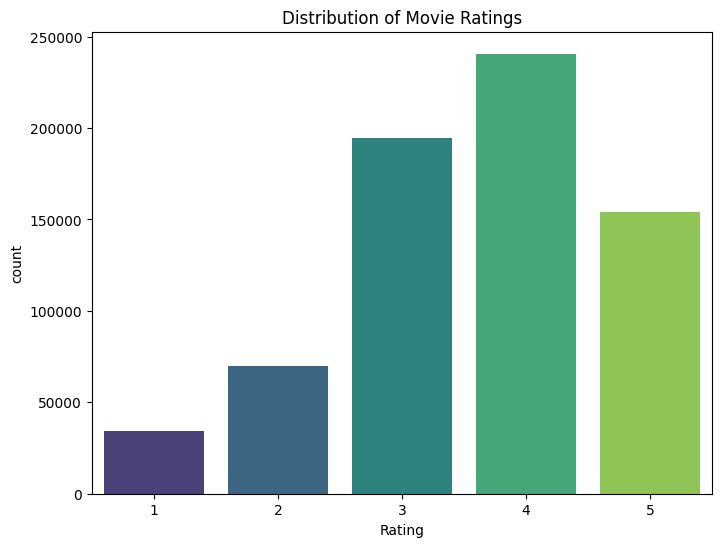

In [ ]:
# Plot the distribution of ratings
plt.figure(figsize=(8,6))
sns.countplot(x='Rating', data=Netflix_dataset, palette='viridis')
plt.title('Distribution of Movie Ratings')
plt.show()


**Distribution of Movie Genres**

In [ ]:
Rating_count = (Netflix_dataset.groupby(by = ["Genre"])["Rating"].count().reset_index())
Rating_count

,Genre,Rating
0,Action,547
1,Animation,94867
2,Biography,72477
3,Comedy,145
4,Crime,57002
5,Documentary,32857
6,Drama,12801
7,Educational,12214
8,Fan,12296
9,Fiction,1019


<ipython-input-9-0d49b1123857>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Genre', data=Netflix_dataset, order=Netflix_dataset['Genre'].value_counts().index, palette='coolwarm')


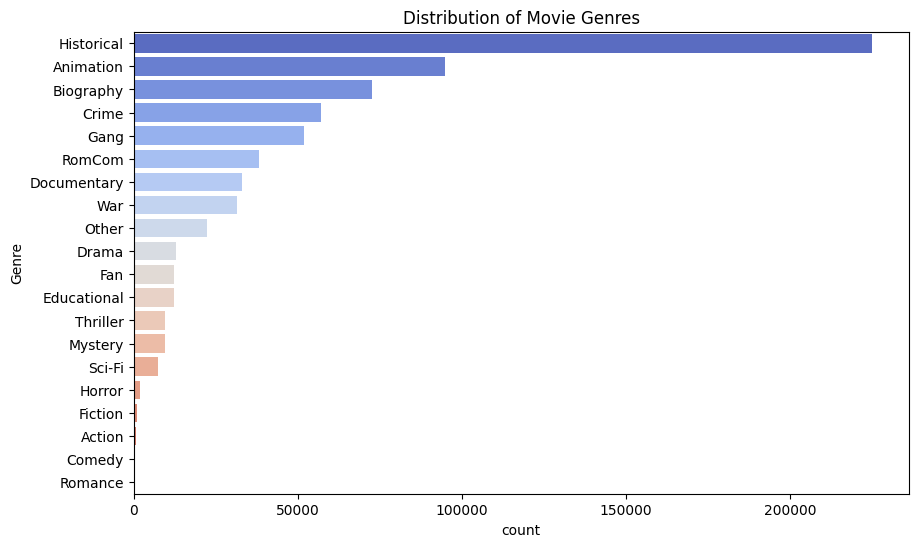

In [ ]:
# Plot the distribution of movie genres
plt.figure(figsize=(10,6))
sns.countplot(y='Genre', data=Netflix_dataset, order=Netflix_dataset['Genre'].value_counts().index, palette='coolwarm')
plt.title('Distribution of Movie Genres')
plt.show()

**Top Movies by Rating Count**

<ipython-input-10-b10aad353539>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='RatingCount', y='MovieName', data=top_movies, palette='Greens_r')


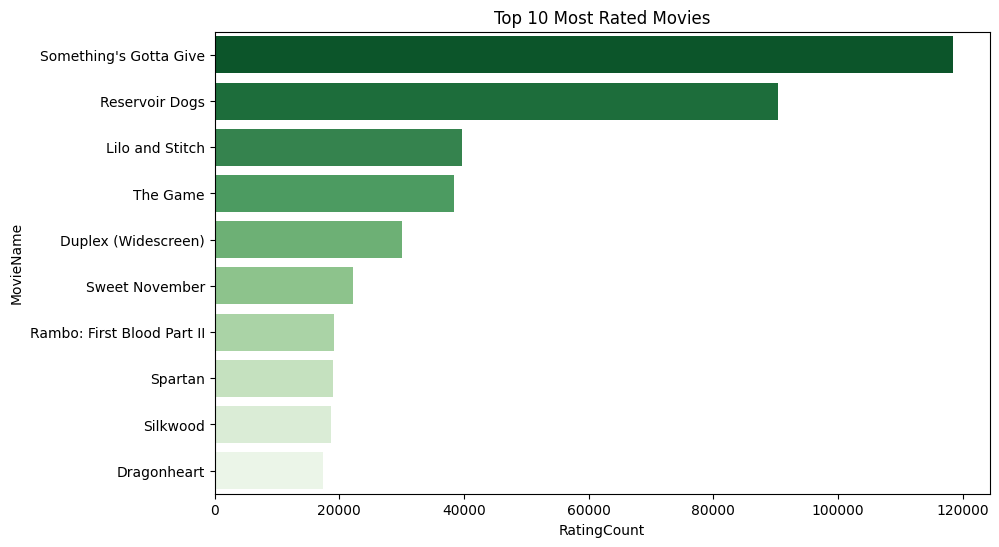

In [ ]:
# Group by MovieName and count ratings
movie_ratings_count = Netflix_dataset.groupby('MovieName').size().reset_index(name='RatingCount')

# Get the top 10 most rated movies
top_movies = movie_ratings_count.sort_values('RatingCount', ascending=False).head(10)

# Plot the top 10 most rated movies
plt.figure(figsize=(10,6))
sns.barplot(x='RatingCount', y='MovieName', data=top_movies, palette='Greens_r')
plt.title('Top 10 Most Rated Movies')
plt.show()


**Top Rated Movies (Average Rating)**

<ipython-input-11-bd3efc4791cc>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Rating', y='MovieName', data=top_rated_movies, palette='Oranges_r')


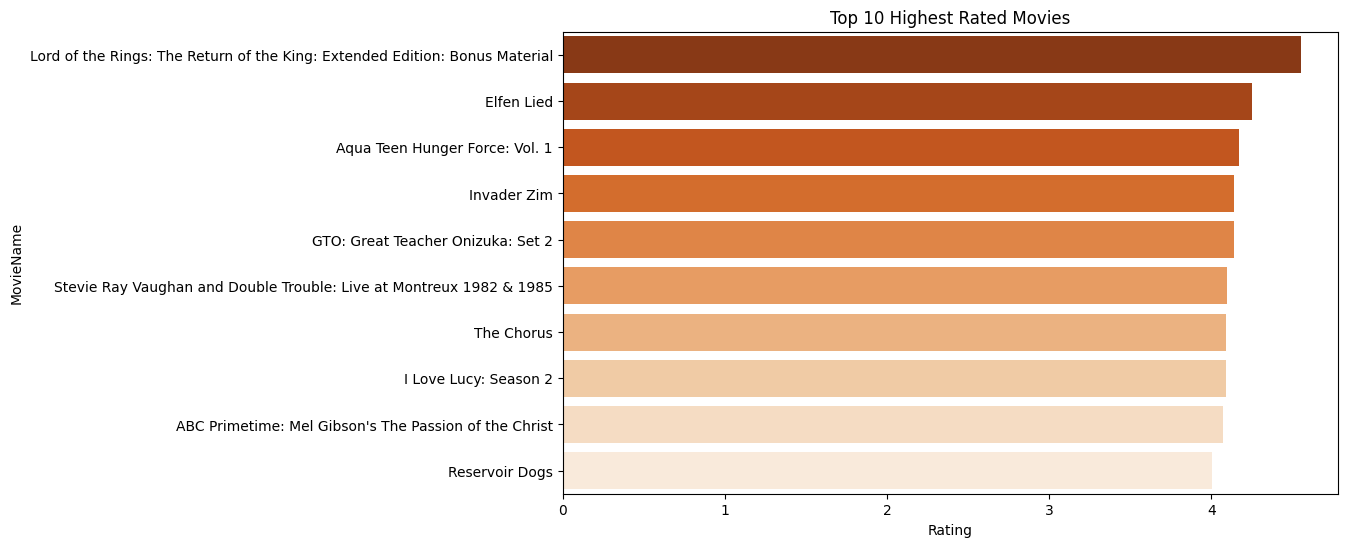

In [ ]:
# Group by MovieName and calculate average rating
avg_ratings = Netflix_dataset.groupby('MovieName')['Rating'].mean().reset_index()

# Sort by average rating and select top 10
top_rated_movies = avg_ratings.sort_values('Rating', ascending=False).head(10)

# Plot the top 10 highest rated movies
plt.figure(figsize=(10,6))
sns.barplot(x='Rating', y='MovieName', data=top_rated_movies, palette='Oranges_r')
plt.title('Top 10 Highest Rated Movies')
plt.show()

**User Activity Analysis**

<ipython-input-12-208e02219356>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='RatingCount', y='Cust_Id', data=top_users, palette='Blues_r')


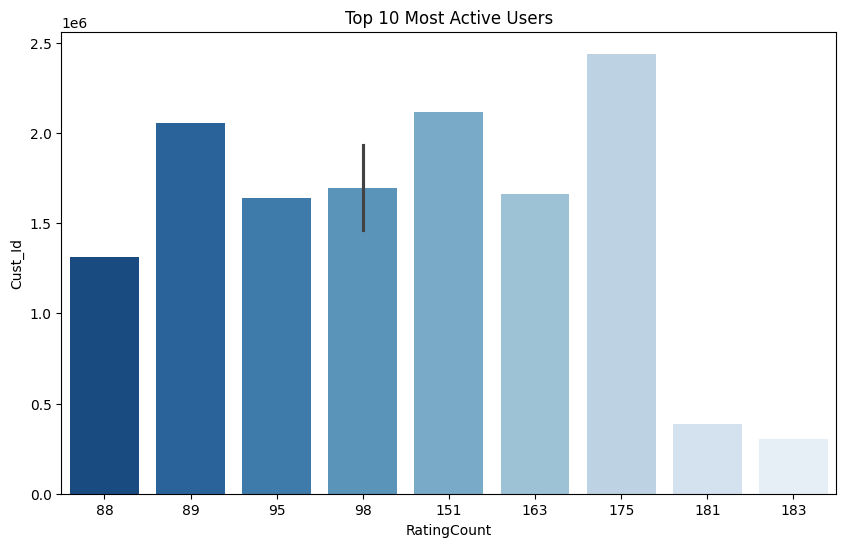

In [ ]:
# Group by Cust_Id and count number of ratings per user
user_activity = Netflix_dataset.groupby('Cust_Id').size().reset_index(name='RatingCount')

# Plot the top 10 most active users
top_users = user_activity.sort_values('RatingCount', ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x='RatingCount', y='Cust_Id', data=top_users, palette='Blues_r')
plt.title('Top 10 Most Active Users')
plt.show()

**Average Rating per User**

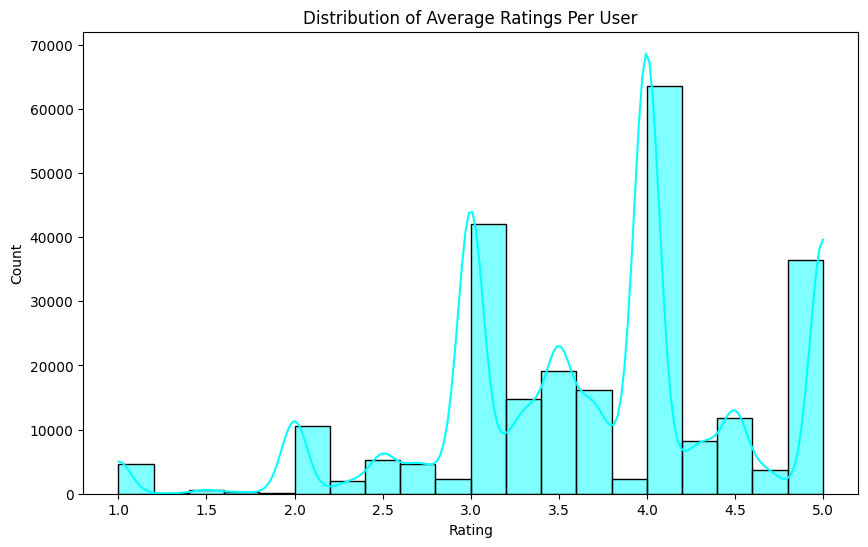

In [ ]:
# Group by Cust_Id and calculate average rating
user_avg_rating = Netflix_dataset.groupby('Cust_Id')['Rating'].mean().reset_index()

# Plot the distribution of average ratings per user
plt.figure(figsize=(10,6))
sns.histplot(user_avg_rating['Rating'], bins=20, kde=True, color='cyan')
plt.title('Distribution of Average Ratings Per User')
plt.show()


**Correlation Analysis**

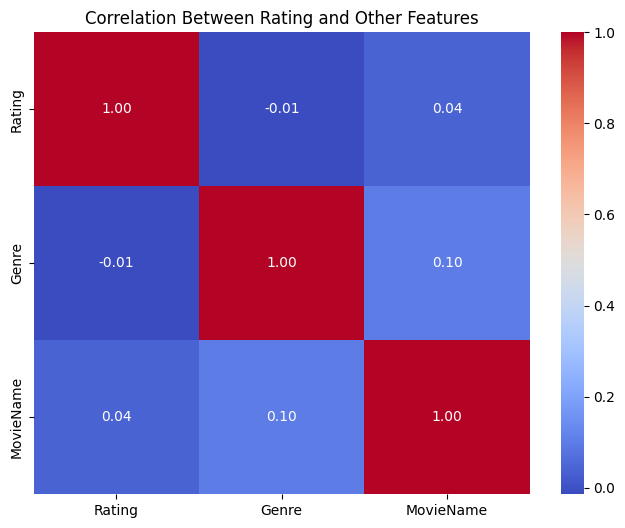

In [ ]:
# Encode categorical variables for correlation
df_encoded = Netflix_dataset.copy()
df_encoded['Genre'] = df_encoded['Genre'].astype('category').cat.codes
df_encoded['MovieName'] = df_encoded['MovieName'].astype('category').cat.codes

# Compute correlation matrix
correlation = df_encoded[['Rating', 'Genre', 'MovieName']].corr()

# Plot the heatmap
plt.figure(figsize=(8,6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Between Rating and Other Features')
plt.show()


The correlations are quite low between the features, meaning that neither Genre nor MovieName strongly influences the Rating.

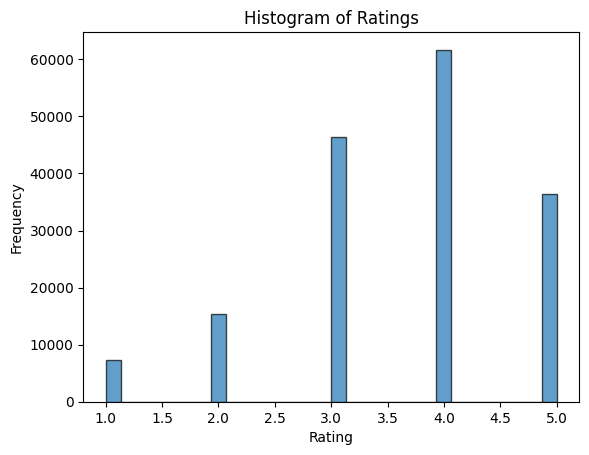

In [ ]:
import matplotlib.pyplot as plt

# Plot a histogram
plt.hist(Netflix_dataset['Rating'], bins=30, edgecolor='black', alpha=0.7)
plt.title('Histogram of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

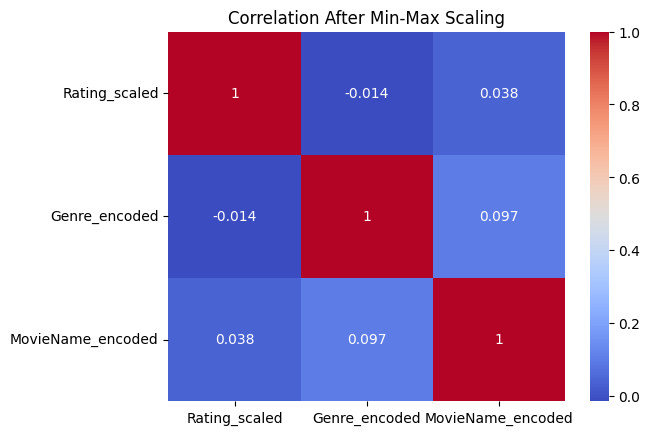

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Select numeric columns (only 'Rating' here)
Netflix_dataset['Rating_scaled'] = scaler.fit_transform(Netflix_dataset[['Rating']])

# For categorical columns ('Genre' and 'MovieName'), you might want to encode them first
Netflix_dataset['Genre_encoded'] = Netflix_dataset['Genre'].astype('category').cat.codes
Netflix_dataset['MovieName_encoded'] = Netflix_dataset['MovieName'].astype('category').cat.codes

# Compute correlation matrix after scaling
correlation_scaled = Netflix_dataset[['Rating_scaled', 'Genre_encoded', 'MovieName_encoded']].corr()

# Visualize the correlation matrix
sns.heatmap(correlation_scaled, annot=True, cmap='coolwarm')
plt.title('Correlation After Min-Max Scaling')
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Select the features and target for the model
features = Netflix_dataset[['Rating_scaled', 'Genre_encoded', 'MovieName_encoded']]
target = Netflix_dataset['Rating']  # Assuming 'Rating' is the target variable

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [ ]:
# Print the shape of the splits to verify
print("Training features shape:", X_train.shape)
print("Testing features shape:", X_test.shape)
print("Training target shape:", y_train.shape)
print("Testing target shape:", y_test.shape)

Training features shape: (133762, 3)
Testing features shape: (33441, 3)
Training target shape: (133762,)
Testing target shape: (33441,)


In [ ]:
# You can also compute the correlation matrix after scaling
correlation_scaled = features.corr()

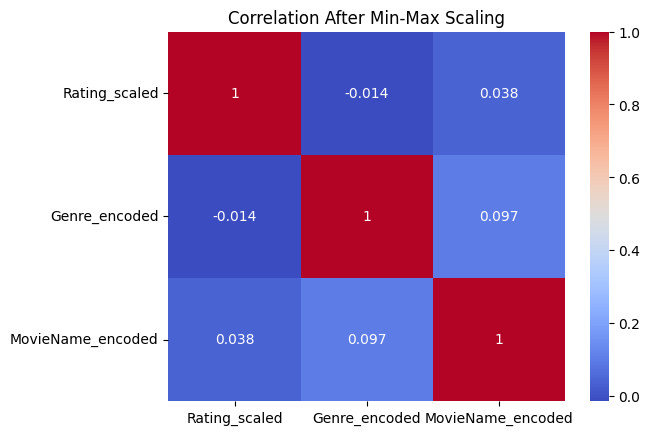

In [ ]:
# Visualize the correlation matrix
sns.heatmap(correlation_scaled, annot=True, cmap='coolwarm')
plt.title('Correlation After Min-Max Scaling')
plt.show()

In [9]:
pip install scikit-surprise


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 3.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp310-cp310-linux_x86_64.whl size=2357269 sha256=71118df277bbc888fca862b20014af8cec37b41e8c806cc4c462f1153f1fa554
  Stored in directory: /root/.cache/pip/wheels/4b/3f/df/6acbf0a40397d9bf3ff97f582cc22fb9ce66adde75bc71fd54
Successfully built scikit-surprise


In [10]:
from surprise import Dataset, Reader, SVD
from surprise.model_selection import cross_validate

In [11]:
reader=Reader()

In [12]:
Netflix_dataset.columns

Index(['Cust_Id', 'Rating', 'Movie_Id', 'Genre', 'MovieName'], dtype='object')

In [13]:
data=Dataset.load_from_df(Netflix_dataset[['Cust_Id','Rating','Movie_Id']],reader)

In [14]:
svd=SVD()

In [15]:
cross_validate(svd,data,measures=['RMSE', 'MAE'],cv=3, verbose=False)


{'test_rmse': array([11.19777615, 11.18905871,         nan]),
 'test_mae': array([9.32988193, 9.30705419,        nan]),
 'fit_time': (0.679563045501709, 0.8813199996948242, 1.0778989791870117),
 'test_time': (0.1191401481628418, 0.26862573623657227, 0.1361250877380371)}

In [16]:
user_1331154=Netflix_dataset.copy()

In [17]:
user_1331154

,Cust_Id,Rating,Movie_Id,Genre,MovieName
0,1488844,3.0,1.0,Action,Dinosaur Planet
1,822109,5.0,1.0,Action,Dinosaur Planet
2,885013,4.0,1.0,Action,Dinosaur Planet
3,30878,4.0,1.0,Action,Dinosaur Planet
4,823519,3.0,1.0,Action,Dinosaur Planet
...,...,...,...,...,...
49539,2460066,5.0,26.0,Crime,Never Die Alone
49540,2495930,2.0,26.0,Crime,Never Die Alone
49541,875288,4.0,26.0,Crime,Never Die Alone
49542,255012,4.0,26.0,Crime,Never Die Alone
